# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
output_dir = output_data_file.split('/')

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = [] #?? get country code from citipy? 

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create url
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_keys.api_key}&q={city}&units={units}"

In [4]:
# loop thru all cities, check if city can be found in openweathermap
# if found, add city to bucket set; if not found, skip and continue
# OpenWeatherMap free account allows 60 calls/min, 
# request 50 cities at a time, wait 55secs then continue loop

city = []       #response["name"]
cloudiness = [] #response["clouds"]["all"]
country = []    #response["sys"]["country"]
date = []       #response["dt"]
humidity = []   #response["main"]["humidity"]
lat = []        #response["coord"]["lat"]
lng = []        #response["coord"]["lon"]
max_temp = []   #response["main"]["temp_max"]
wind_speed = [] #response["wind"]["speed"]
city_not_found = []
sleep_interval = 0

basket_counter = 1
city_counter = 0

newline = '\n'
first_line = "Beginning Data Retrieval"
last_line = "Data Retrieval Complete"
just_line = "-------------------------------------"
not_found = "City not found... Skipping"
print(first_line)
print(just_line)
output_log = os.path.join(output_dir[0], "output_log.txt")
with open(output_log, 'w', newline='') as logfile:
    logfile.write(first_line + newline)
    logfile.write(just_line + newline)
    
    start_time = time.time()
    
    for x in range(len(cities)):

        query_url = f"{url}appid={api_keys.api_key}&q={cities[x]}&units={units}"
        
        response = requests.get(query_url).json()

        try:
            city.append(response["name"])

            try:
                country.append(response["sys"]["country"])
                date.append(response["dt"])
                humidity.append(response["main"]["humidity"])
                lat.append(response["coord"]["lat"])
                lng.append(response["coord"]["lon"])
                max_temp.append(response["main"]["temp_max"])
                wind_speed.append(response["wind"]["speed"])
                cloudiness.append(response["clouds"]["all"])

                city_counter += 1
                process_msg = f"Processing Record {city_counter} of Set {basket_counter} | {cities[x]}"
                print(process_msg)
                print(query_url)
                logfile.write(process_msg + newline)
                logfile.write(query_url + newline)
                
                if (len(city) % 50) == 0:
                    sleep_interval = time.time() - start_time
                    basket_counter += 1
                    city_counter = 0
                    time.sleep(60 - sleep_interval)
                    start_time = time.time()

            except:
                process_msg = "Other error."
                print(process_msg)
                logfile.write(process_msg + newline)
                pass

        except:
            process_msg = f"{not_found} {cities[x]}"
            print(process_msg)
            logfile.write(process_msg + newline)
            city_not_found.append(cities[x])
            pass

    logfile.write(just_line + newline)
    logfile.write(last_line + newline)
    logfile.write(just_line + newline)


Beginning Data Retrieval
-------------------------------------
City not found... Skipping ciras
Processing Record 1 of Set 1 | katsuura
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=katsuura&units=imperial
City not found... Skipping mys shmidta
Processing Record 2 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=albany&units=imperial
City not found... Skipping grand river south east
Processing Record 3 of Set 1 | safranbolu
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=safranbolu&units=imperial
Processing Record 4 of Set 1 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=port elizabeth&units=imperial
Processing Record 5 of Set 1 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=tuktoyaktuk&units=imperial
City not found... Skipping rawannawi


Processing Record 3 of Set 2 | detva
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=detva&units=imperial
Processing Record 4 of Set 2 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=busselton&units=imperial
Processing Record 5 of Set 2 | mahina
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=mahina&units=imperial
Processing Record 6 of Set 2 | terrace
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=terrace&units=imperial
Processing Record 7 of Set 2 | tautira
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=tautira&units=imperial
Processing Record 8 of Set 2 | khatanga
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=khatanga&units=imperial
Processing Record 9 of Set 2 | matara
http://api.openweathermap.org/data/2.5/weather?appid=a967d36de

Processing Record 7 of Set 3 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=qaanaaq&units=imperial
Processing Record 8 of Set 3 | trincomalee
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=trincomalee&units=imperial
Processing Record 9 of Set 3 | meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=meulaboh&units=imperial
Processing Record 10 of Set 3 | acapulco
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=acapulco&units=imperial
Processing Record 11 of Set 3 | lompoc
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=lompoc&units=imperial
Processing Record 12 of Set 3 | tual
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=tual&units=imperial
Processing Record 13 of Set 3 | talnakh
http://api.openweathermap.org/data/2.5/weather?appid=

Processing Record 10 of Set 4 | samarai
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=samarai&units=imperial
Processing Record 11 of Set 4 | muros
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=muros&units=imperial
Processing Record 12 of Set 4 | poronaysk
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=poronaysk&units=imperial
City not found... Skipping illoqqortoormiut
Processing Record 13 of Set 4 | banjar
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=banjar&units=imperial
Processing Record 14 of Set 4 | meru
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=meru&units=imperial
Processing Record 15 of Set 4 | maumere
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=maumere&units=imperial
Processing Record 16 of Set 4 | kanniyakumari
http://api.o

Processing Record 13 of Set 5 | vyartsilya
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=vyartsilya&units=imperial
Processing Record 14 of Set 5 | kendari
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=kendari&units=imperial
Processing Record 15 of Set 5 | tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=tuatapere&units=imperial
Processing Record 16 of Set 5 | sheregesh
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=sheregesh&units=imperial
Processing Record 17 of Set 5 | issia
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=issia&units=imperial
Processing Record 18 of Set 5 | mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=mount gambier&units=imperial
Processing Record 19 of Set 5 | nyurba
http://api.openweathermap.org/dat

Processing Record 17 of Set 6 | awjilah
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=awjilah&units=imperial
Processing Record 18 of Set 6 | husavik
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=husavik&units=imperial
Processing Record 19 of Set 6 | faya
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=faya&units=imperial
Processing Record 20 of Set 6 | concordia
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=concordia&units=imperial
Processing Record 21 of Set 6 | prince rupert
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=prince rupert&units=imperial
Processing Record 22 of Set 6 | nehe
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=nehe&units=imperial
Processing Record 23 of Set 6 | antsohihy
http://api.openweathermap.org/data/2.5/weather?a

Processing Record 22 of Set 7 | marienburg
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=marienburg&units=imperial
Processing Record 23 of Set 7 | ahuimanu
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=ahuimanu&units=imperial
Processing Record 24 of Set 7 | puerto ayacucho
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=puerto ayacucho&units=imperial
Processing Record 25 of Set 7 | ende
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=ende&units=imperial
City not found... Skipping dipkarpaz
City not found... Skipping ndiekro
Processing Record 26 of Set 7 | santa isabel
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=santa isabel&units=imperial
Processing Record 27 of Set 7 | semnan
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=semnan&units=imper

City not found... Skipping zhaocheng
Processing Record 24 of Set 8 | orbetello
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=orbetello&units=imperial
Processing Record 25 of Set 8 | kondinskoye
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=kondinskoye&units=imperial
Processing Record 26 of Set 8 | keti bandar
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=keti bandar&units=imperial
Processing Record 27 of Set 8 | paamiut
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=paamiut&units=imperial
Processing Record 28 of Set 8 | vanimo
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=vanimo&units=imperial
Processing Record 29 of Set 8 | raudeberg
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=raudeberg&units=imperial
City not found... Skipping louisbou

City not found... Skipping henzada
Processing Record 27 of Set 9 | sri aman
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=sri aman&units=imperial
Processing Record 28 of Set 9 | rio gallegos
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=rio gallegos&units=imperial
Processing Record 29 of Set 9 | prado
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=prado&units=imperial
Processing Record 30 of Set 9 | ketchikan
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=ketchikan&units=imperial
Processing Record 31 of Set 9 | treinta y tres
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=treinta y tres&units=imperial
Processing Record 32 of Set 9 | jacareacanga
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=jacareacanga&units=imperial
Processing Record 33 of

Processing Record 30 of Set 10 | rosarito
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=rosarito&units=imperial
Processing Record 31 of Set 10 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=saint-pierre&units=imperial
Processing Record 32 of Set 10 | karasjok
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=karasjok&units=imperial
Processing Record 33 of Set 10 | vardo
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=vardo&units=imperial
Processing Record 34 of Set 10 | dingzhou
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=dingzhou&units=imperial
Processing Record 35 of Set 10 | russell
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=russell&units=imperial
Processing Record 36 of Set 10 | darapidap
http://api.openweathermap.org/dat

Processing Record 34 of Set 11 | mwene-ditu
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=mwene-ditu&units=imperial
Processing Record 35 of Set 11 | kaeo
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=kaeo&units=imperial
Processing Record 36 of Set 11 | lufilufi
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=lufilufi&units=imperial
Processing Record 37 of Set 11 | manaus
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=manaus&units=imperial
Processing Record 38 of Set 11 | lalibela
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=lalibela&units=imperial
Processing Record 39 of Set 11 | ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=ambilobe&units=imperial
Processing Record 40 of Set 11 | port blair
http://api.openweathermap.org/data/2.5/w

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create city data frame
city_df = pd.DataFrame({"City" : city,
                       "Cloudiness" : cloudiness,
                       "Country" : country,
                       "Date" : date,
                       "Humidity" : humidity,
                       "Lat" : lat,
                       "Lng" : lng,
                       "Max Temp" : max_temp,
                       "Wind Speed" : wind_speed})

city_df.count()

City          568
Cloudiness    568
Country       568
Date          568
Humidity      568
Lat           568
Lng           568
Max Temp      568
Wind Speed    568
dtype: int64

In [6]:
#export to csv file
output_file = os.path.join(output_dir[0], output_dir[1])
city_df.to_csv(output_file, index=True)

In [7]:
city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Katsuura,75,JP,1604712646,67,35.13,140.30,71.01,4.70
1,Albany,33,US,1604713341,53,42.60,-73.97,55.99,5.19
2,Safranbolu,42,TR,1604713434,80,41.25,32.69,45.16,1.45
3,Port Elizabeth,20,ZA,1604712891,87,-33.92,25.57,57.20,1.12
4,Tuktoyaktuk,40,CA,1604712883,78,69.45,-133.04,15.80,18.34
...,...,...,...,...,...,...,...,...,...
563,Hudson Bay,100,CA,1604714095,92,52.85,-102.38,26.69,1.99
564,Vao,0,NC,1604714095,77,-22.67,167.48,75.52,11.61
565,Maraã,76,BR,1604714095,95,-1.83,-65.37,75.16,2.59
566,Emerald,75,AU,1604714095,51,-23.53,148.17,86.00,12.75


In [8]:
city_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,568.000000,5.680000e+02,568.000000,568.00000,568.000000,568.000000,568.000000
mean,51.570423,1.604714e+09,74.713028,19.23294,19.401972,57.884771,8.104384
std,40.515836,2.767429e+02,19.029830,33.60176,92.820041,22.453503,6.170600
min,0.000000,1.604713e+09,7.000000,-54.80000,-179.170000,-21.980000,0.450000
25%,1.000000,1.604714e+09,64.750000,-8.13000,-63.030000,45.352500,3.560000
50%,59.000000,1.604714e+09,78.000000,21.55500,24.390000,62.010000,6.710000
75%,91.250000,1.604714e+09,89.000000,47.45250,105.977500,75.990000,10.455000
max,100.000000,1.604714e+09,100.000000,78.22000,179.320000,93.150000,48.320000


**Remove cities where Humidity > 100%**  
Not necessary if there are no cities with Humidity > 100%

In [9]:
humid_cities = city_df["City"].loc[city_df["Humidity"] > 100].count()
if humid_cities > 0:
    city_df = city_df.loc[city_df["Humidity"] <= 100]
city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Katsuura,75,JP,1604712646,67,35.13,140.30,71.01,4.70
1,Albany,33,US,1604713341,53,42.60,-73.97,55.99,5.19
2,Safranbolu,42,TR,1604713434,80,41.25,32.69,45.16,1.45
3,Port Elizabeth,20,ZA,1604712891,87,-33.92,25.57,57.20,1.12
4,Tuktoyaktuk,40,CA,1604712883,78,69.45,-133.04,15.80,18.34
...,...,...,...,...,...,...,...,...,...
563,Hudson Bay,100,CA,1604714095,92,52.85,-102.38,26.69,1.99
564,Vao,0,NC,1604714095,77,-22.67,167.48,75.52,11.61
565,Maraã,76,BR,1604714095,95,-1.83,-65.37,75.16,2.59
566,Emerald,75,AU,1604714095,51,-23.53,148.17,86.00,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

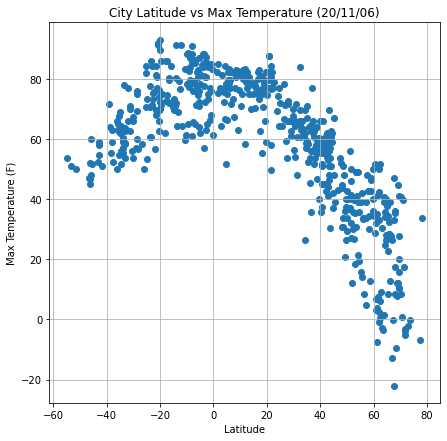

In [10]:
# create a scatter plot latitude v temperature
from datetime import datetime
dt = int(date[0])
plot_date = datetime.fromtimestamp(dt).strftime('%y/%m/%d')
x_lat = city_df['Lat']
y_temp = city_df['Max Temp']
fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(x_lat, y_temp)
plt.title(f"City Latitude vs Max Temperature ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_temp.png")
plt.savefig(file)


#### Latitude vs. Humidity Plot

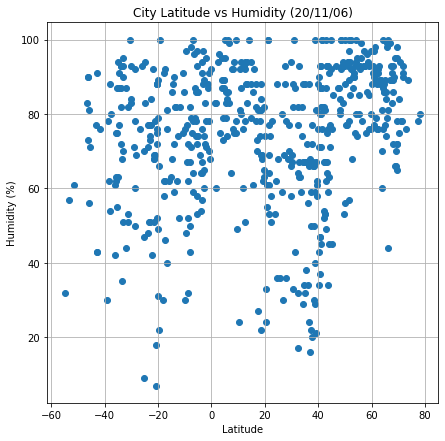

In [11]:
y_hum = city_df["Humidity"]

fig, ax1 = plt.subplots(figsize=(7,7))
ax1.set_autoscale_on(True)
ax1.scatter(x_lat, y_hum)
plt.title(f"City Latitude vs Humidity ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_humid.png")
plt.savefig(file)

#### Latitude vs. Cloudiness Plot

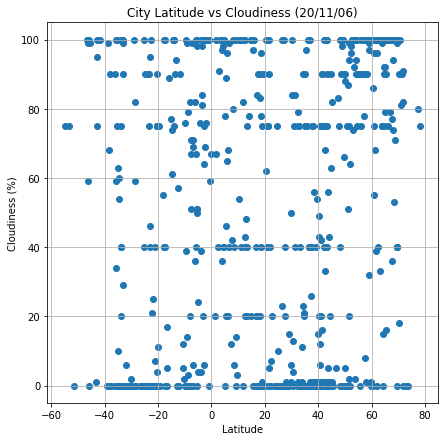

In [12]:
y_cloud = city_df["Cloudiness"]
fig, ax2 = plt.subplots(figsize=(7,7))
ax2.set_autoscale_on(True)
ax2.scatter(x_lat, y_cloud)
plt.title(f"City Latitude vs Cloudiness ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_cloud.png")
plt.savefig(file)

#### Latitude vs. Wind Speed Plot

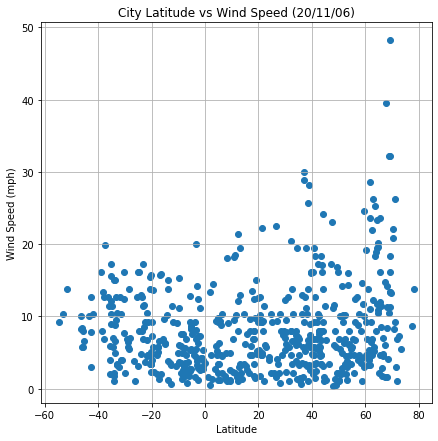

In [13]:
y_wind = city_df["Wind Speed"]
fig, ax3 = plt.subplots(figsize=(7,7))
ax3.set_autoscale_on(True)
ax3.scatter(x_lat, y_wind)
plt.title(f"City Latitude vs Wind Speed ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_wind.png")
plt.savefig(file)

## Linear Regression

In [14]:
# dependencies
import scipy.stats as st

### Create data frame for northern and southern hemispheres

In [15]:
# northern hemisphere data frame
north_df = city_df[city_df["Lat"] >= 0]
north_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Katsuura,75,JP,1604712646,67,35.13,140.30,71.01,4.70
1,Albany,33,US,1604713341,53,42.60,-73.97,55.99,5.19
2,Safranbolu,42,TR,1604713434,80,41.25,32.69,45.16,1.45
4,Tuktoyaktuk,40,CA,1604712883,78,69.45,-133.04,15.80,18.34
5,Mayo,1,US,1604713434,100,38.89,-76.51,55.40,6.20
...,...,...,...,...,...,...,...,...,...
560,Lata,43,PT,1604714095,90,40.16,-8.33,57.99,4.81
561,Mokhsogollokh,100,RU,1604714095,92,61.47,128.92,3.94,3.94
562,Hambantota,20,LK,1604714095,100,6.12,81.12,77.00,4.70
563,Hudson Bay,100,CA,1604714095,92,52.85,-102.38,26.69,1.99


In [16]:
# southern hemisphere data frame
south_df = city_df[city_df["Lat"] < 0]
south_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
3,Port Elizabeth,20,ZA,1604712891,87,-33.92,25.57,57.20,1.12
7,Ushuaia,75,AR,1604712864,32,-54.80,-68.30,53.60,9.17
11,Paracuru,98,BR,1604713435,76,-3.41,-39.03,81.00,20.00
14,Carnarvon,90,AU,1604713162,83,-24.87,113.63,73.40,16.11
15,Puerto Ayora,0,EC,1604713168,78,-0.74,-90.35,68.00,4.00
...,...,...,...,...,...,...,...,...,...
556,Perth,0,AU,1604714094,44,-31.93,115.83,77.00,12.75
557,Bagé,0,BR,1604714094,82,-31.33,-54.11,62.60,10.29
564,Vao,0,NC,1604714095,77,-22.67,167.48,75.52,11.61
565,Maraã,76,BR,1604714095,95,-1.83,-65.37,75.16,2.59


### Northern Hemisphere - Max Temperature vs Latitude

In [17]:
north_x_lat = north_df["Lat"]
north_y_temp = north_df["Max Temp"]

nt_corr_coef = round(st.pearsonr(north_x_lat, north_y_temp)[0],2)
print(f"correlation coefficient: {nt_corr_coef}")

n_temp = st.linregress(north_x_lat, north_y_temp)
print(f"The r-value is {round(n_temp.rvalue,2)}")


correlation coefficient: -0.86
The r-value is -0.86


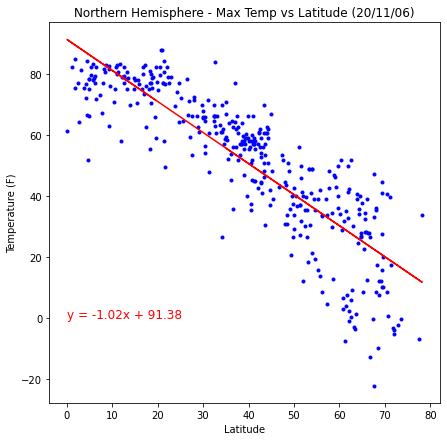

In [18]:
#create equation of line
line = n_temp.slope * north_x_lat + n_temp.intercept
line_eq = f"y = {round(n_temp.slope,2)}x + {round(n_temp.intercept,2)}"

# plot linear model on top of scatter plot
fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(north_x_lat, north_y_temp, marker='.', facecolors="blue", edgecolors="blue")
plt.plot(north_x_lat, line, 'r-')
plt.title(f"Northern Hemisphere - Max Temp vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq, (0,0), fontsize=12, color="red")

file = os.path.join("images", "north_lat_temp.png")
plt.savefig(file)

### Southern Hemisphere - Max Temperature vs Latitude

In [19]:
south_x_lat = south_df["Lat"]
south_y_temp = south_df["Max Temp"]

s_corr_coef = round(st.pearsonr(south_x_lat, south_y_temp)[0],2)
print(f"correlation coefficient: {s_corr_coef}")

s_temp = st.linregress(south_x_lat, south_y_temp)
print(f"The r-value is {s_temp.rvalue}")


correlation coefficient: 0.67
The r-value is 0.673233098350132


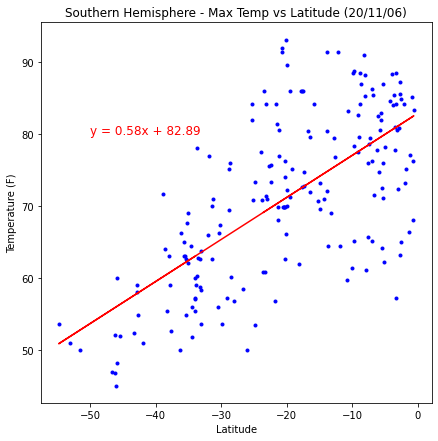

In [20]:
#create equation of line
line = s_temp.slope * south_x_lat + s_temp.intercept
line_eq = f"y = {round(s_temp.slope,2)}x + {round(s_temp.intercept,2)}"

# plot linear model on top of scatter plot
fig, axs = plt.subplots(figsize=(7,7))
axs.set_autoscale_on(True)
axs.scatter(south_x_lat, south_y_temp, marker='.', facecolors="blue", edgecolors="blue")
plt.plot(south_x_lat, line, 'r-')
plt.title(f"Southern Hemisphere - Max Temp vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq, (-50,80), fontsize=12, color="red")

file = os.path.join("images", "south_lat_temp.png")
plt.savefig(file)

**Temperature (F) vs Latitude Linear Regression (Northern and Southern Hemisphere)**

* The correlation coeffient and linear regression model shows a strong negative correlation between latitude and maximum temperature in the northern hemisphere. As the latitude decreases, the temperature increases.

* In the southern hemisphere, the correlation coefficient and linear regression model shows a moderate positive correlation between latitude and maximum temperature. As the latitude increases towards zero, the temperature increases as well.


### Northern Hemisphere - Humidity (%) vs Latitude

In [21]:
north_y_hum = north_df["Humidity"]

n_corr_coef = round(st.pearsonr(north_x_lat, north_y_hum)[0],2)
print(f"correlation coefficient: {n_corr_coef}")

n_humid = st.linregress(north_x_lat, north_y_hum)
print(f"The r-value is {n_humid.rvalue}")


correlation coefficient: 0.18
The r-value is 0.18318688832885474


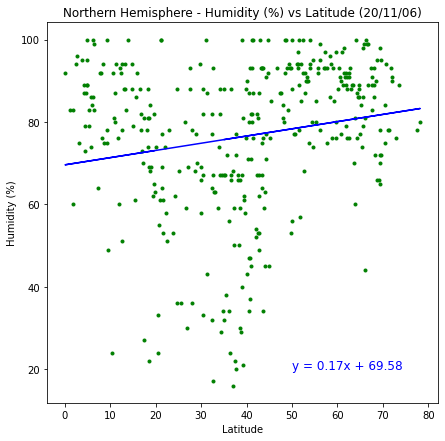

In [22]:
#create equation of line
line = n_humid.slope * north_x_lat + n_humid.intercept
line_eq = f"y = {round(n_humid.slope,2)}x + {round(n_humid.intercept,2)}"

# plot linear model on top of scatter plot
fig, nh = plt.subplots(figsize=(7,7))
nh.set_autoscale_on(True)
nh.scatter(north_x_lat, north_y_hum, marker='.', facecolors="green", edgecolors="green")
plt.plot(north_x_lat, line, 'b-')
plt.title(f"Northern Hemisphere - Humidity (%) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (50,20), fontsize=12, color="blue")

file = os.path.join("images", "north_lat_humid.png")
plt.savefig(file)

### Southern Hemisphere - Humidity (%) vs Latitude

In [23]:
south_y_hum = south_df["Humidity"]

s_corr_coef = round(st.pearsonr(south_x_lat, south_y_hum)[0],2)
print(f"correlation coefficient: {s_corr_coef}")

s_humid = st.linregress(south_x_lat, south_y_hum)
print(f"The r-value is {s_humid.rvalue}")


correlation coefficient: 0.1
The r-value is 0.0985754150201947


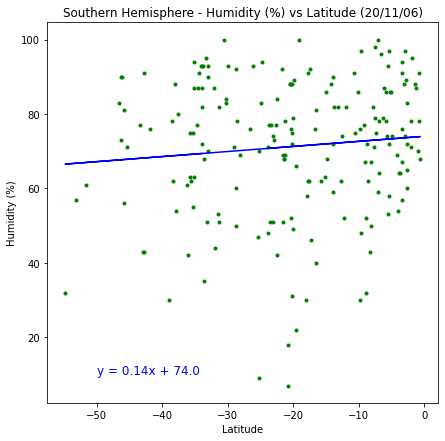

In [24]:
#create equation of line
line = s_humid.slope * south_x_lat + s_humid.intercept
line_eq = f"y = {round(s_humid.slope,2)}x + {round(s_humid.intercept,2)}"

# plot linear model on top of scatter plot
fig, sh = plt.subplots(figsize=(7,7))
sh.set_autoscale_on(True)
sh.scatter(south_x_lat, south_y_hum, marker='.', facecolors="green", edgecolors="green")
plt.plot(south_x_lat, line, 'b-')
plt.title(f"Southern Hemisphere - Humidity (%) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (-50,10), fontsize=12, color="blue")

file = os.path.join("images", "south_lat_humid.png")
plt.savefig(file)

**Humidity (%) vs Latitude Linear Regression (Northern and Southern Hemisphere)**

* The correlation coefficent and linear regression model for humidity vs latitude shows a weak positive correlation for both hemispheres.

### Northern Hemisphere - Cloudiness (%) vs Latitude

In [25]:
north_y_cloud = north_df["Cloudiness"]

n_corr_coef = round(st.pearsonr(north_x_lat, north_y_cloud)[0],2)
print(f"correlation coefficient: {n_corr_coef}")

north_cloud = st.linregress(north_x_lat, north_y_cloud)
print(f"The r-value is {north_cloud.rvalue}")

correlation coefficient: 0.2
The r-value is 0.19994023888066478


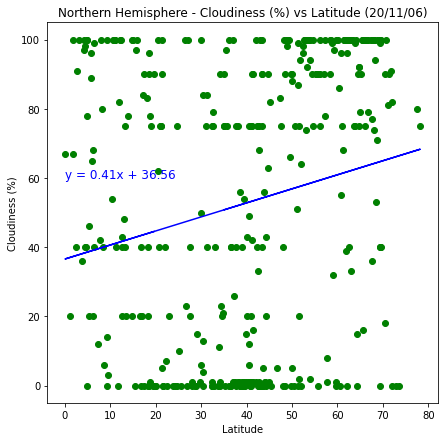

In [26]:
#create equation of line
line = north_cloud.slope * north_x_lat + north_cloud.intercept
line_eq = f"y = {round(north_cloud.slope,2)}x + {round(north_cloud.intercept,2)}"

# plot linear model on top of scatter plot
fig, nc = plt.subplots(figsize=(7,7))
nc.set_autoscale_on(True)
nc.scatter(north_x_lat, north_y_cloud, marker='o', facecolors="green", edgecolors="green")
plt.plot(north_x_lat, line, 'b-')
plt.title(f"Northern Hemisphere - Cloudiness (%) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (0, 60), fontsize=12, color="blue")

file = os.path.join("images", "north_lat_cloud.png")
plt.savefig(file)

### Southern Hemisphere - Cloudiness (%) vs Latitude

In [27]:
south_y_cloud = south_df["Cloudiness"]

s_corr_coef = round(st.pearsonr(south_x_lat, south_y_cloud)[0],2)
print(f"correlation coefficient: {s_corr_coef}")

south_cloud = st.linregress(south_x_lat, south_y_cloud)
print(f"The r-value is {south_cloud.rvalue}")

correlation coefficient: 0.08
The r-value is 0.07819476319835113


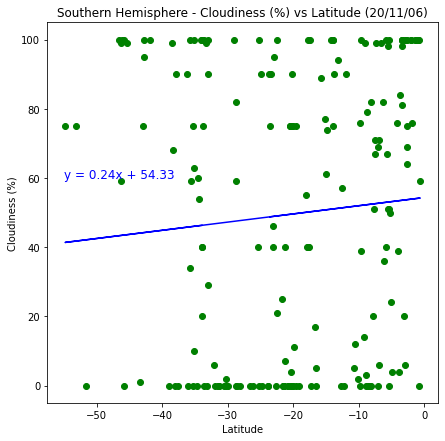

In [28]:
#create equation of line
line = south_cloud.slope * south_x_lat + south_cloud.intercept
line_eq = f"y = {round(south_cloud.slope,2)}x + {round(south_cloud.intercept,2)}"

# plot linear model on top of scatter plot
fig, sc = plt.subplots(figsize=(7,7))
sc.set_autoscale_on(True)
sc.scatter(south_x_lat, south_y_cloud, marker='o', facecolors="green", edgecolors="green")
plt.plot(south_x_lat, line, 'b-')
plt.title(f"Southern Hemisphere - Cloudiness (%) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (-55, 60), fontsize=12, color="blue")

file = os.path.join("images", "south_lat_cloud.png")
plt.savefig(file)

**Cloudiness (%) vs Latitude Linear Regression (Northern and Southern Hemisphere)**

* The correlation coefficient and linear regression model show a weak positive correlation between cloudiness and latitude in the northern hemisphere and an even weaker positive correlation in the southern hemisphere.

### Northern Hemisphere - Wind Speed (mph) vs Latitude

In [29]:
north_y_wind = north_df["Wind Speed"]

n_corr_coef = round(st.pearsonr(north_x_lat, north_y_wind)[0],2)
print(f"correlation coefficient: {n_corr_coef}")

north_wind = st.linregress(north_x_lat, north_y_wind)
print(f"The r-value is {north_wind.rvalue}")

correlation coefficient: 0.26
The r-value is 0.25820537732047305


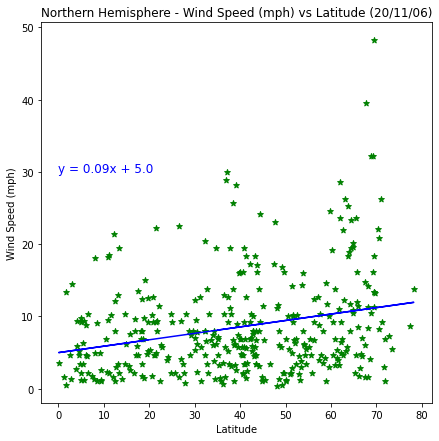

In [34]:
#create equation of line
line = north_wind.slope * north_x_lat + north_wind.intercept
line_eq = f"y = {round(north_wind.slope,2)}x + {round(north_wind.intercept,2)}"

# plot linear model on top of scatter plot
fig, nw = plt.subplots(figsize=(7,7))
nw.set_autoscale_on(True)
nw.scatter(north_x_lat, north_y_wind, marker='*', facecolors="green", edgecolors="green")
plt.plot(north_x_lat, line, 'b-')
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq, (0, 30), fontsize=12, color="blue")

file = os.path.join("images", "north_lat_wind.png")
plt.savefig(file)

### Southern Hemisphere - Wind Speed (mph) vs Latitude

In [31]:
south_y_wind = south_df["Wind Speed"]

s_corr_coef = round(st.pearsonr(south_x_lat, south_y_wind)[0],2)
print(f"correlation coefficient: {s_corr_coef}")

south_wind = st.linregress(south_x_lat, south_y_wind)
print(f"The r-value is {south_wind.rvalue}")

correlation coefficient: -0.3
The r-value is -0.29614295920169714


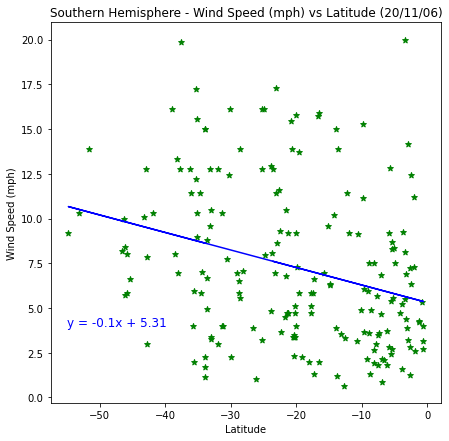

In [35]:
#create equation of line
line = south_wind.slope * south_x_lat + south_wind.intercept
line_eq = f"y = {round(south_wind.slope,2)}x + {round(south_wind.intercept,2)}"

# plot linear model on top of scatter plot
fig, sw = plt.subplots(figsize=(7,7))
sw.set_autoscale_on(True)
sw.scatter(south_x_lat, south_y_wind, marker='*', facecolors="green", edgecolors="green")
plt.plot(south_x_lat, line, 'b-')
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq, (-55, 4), fontsize=12, color="blue")

file = os.path.join("images", "south_lat_wind.png")
plt.savefig(file)

**Wind Speed (mph) vs Latitude Linear Regression (Northern and Southern Hemisphere)**

* The correlation coefficient and linear regression model show a weak positive correlation between wind speed (mph) and latitude in the northern hemisphere.

* The correlation coefficient and linear regression model show an almost moderate negative correlation between wind speed (mph) and latitude in the southern hemisphere.

### Temperature (F) vs Latitude
* color based on the temperature

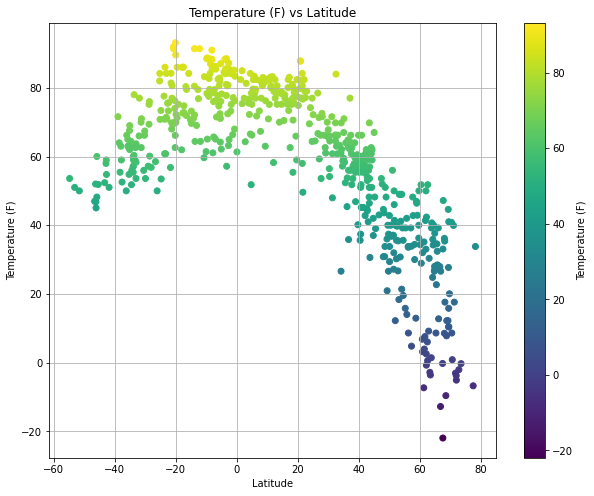

In [33]:
colors = y_temp

fig, ax = plt.subplots(figsize=(10,8))
ax.set_autoscale_on(True)
plt.scatter(x_lat,y_temp, c=colors)
colorbar = plt.colorbar()
colorbar.ax.set_ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature (F) vs Latitude")
plt.grid()

file = os.path.join("images", "heatmap.png")
plt.savefig(file)